In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Import local modules
from src.DLA import dla_simulation, init_mask, find_optimal_omega


In [53]:
# Set the parameters
N = 100
max_size = 1000
tol = 1e-5
omega = 1.8

mask = init_mask(N)
grid = np.zeros((N, N))
grid[0, :] = 1.0

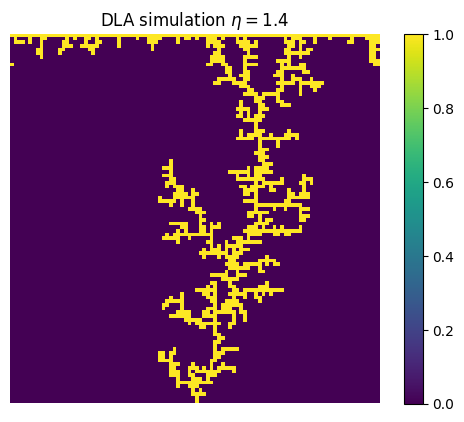

In [54]:
eta = 1.4
mask_history, grid_history, _ = dla_simulation(omega, eta, grid, max_size, N, tol, mask)
# animate the simulation
fig, ax = plt.subplots()

image = grid_history[-1]
image[mask_history[-1]] = 10
img = ax.imshow(image, cmap='viridis', alpha=1, vmin=0, vmax=1)
plt.colorbar(img)

plt.title(r'DLA simulation $\eta = 1.4$')
plt.axis('off')

plt.show()


In [33]:
total_heights = []
total_widths = []
for eta in [0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5]:
    print(f"eta = {eta}")
    local_heights = []
    local_widths = []
    for _ in range(10):
        mask_history, grid_history, _ = dla_simulation(omega, eta, grid, max_size, N, tol, mask)
        final_height = np.count_nonzero(np.any(mask_history[-1], axis=1))
        final_width = np.count_nonzero(np.any(mask_history[-1], axis=0))
        final_density = max_size / (final_height * final_width)
        print(f"Final density: {final_density}")
        
        local_heights.append(final_height)
        local_widths.append(final_width)
    
        mask = init_mask(N)
        grid = np.zeros((N, N))
        grid[0, :] = 1.0
    total_heights.append(local_heights)
    total_widths.append(local_widths)

        


eta = 0.1
Final density: 0.4616805170821791
Final density: 0.4789272030651341
Final density: 0.5197505197505198
Final density: 0.5494505494505495
Final density: 0.45454545454545453
Final density: 0.5299417064122947
Final density: 0.49603174603174605
Final density: 0.5005005005005005
Final density: 0.5717552887364208
Final density: 0.49776007964161273
eta = 0.3
Final density: 0.3952569169960474
Final density: 0.390625
Final density: 0.37523452157598497
Final density: 0.41339396444811904
Final density: 0.4616805170821791
Final density: 0.4342162396873643
Final density: 0.42735042735042733
Final density: 0.42517006802721086
Final density: 0.4208754208754209
Final density: 0.41017227235438886
eta = 0.5
Final density: 0.36363636363636365
Final density: 0.3429355281207133
Final density: 0.30931023816888337
Final density: 0.32679738562091504
Final density: 0.34965034965034963
Final density: 0.3259452411994785
Final density: 0.27344818156959255
Final density: 0.33167495854063017
Final density:

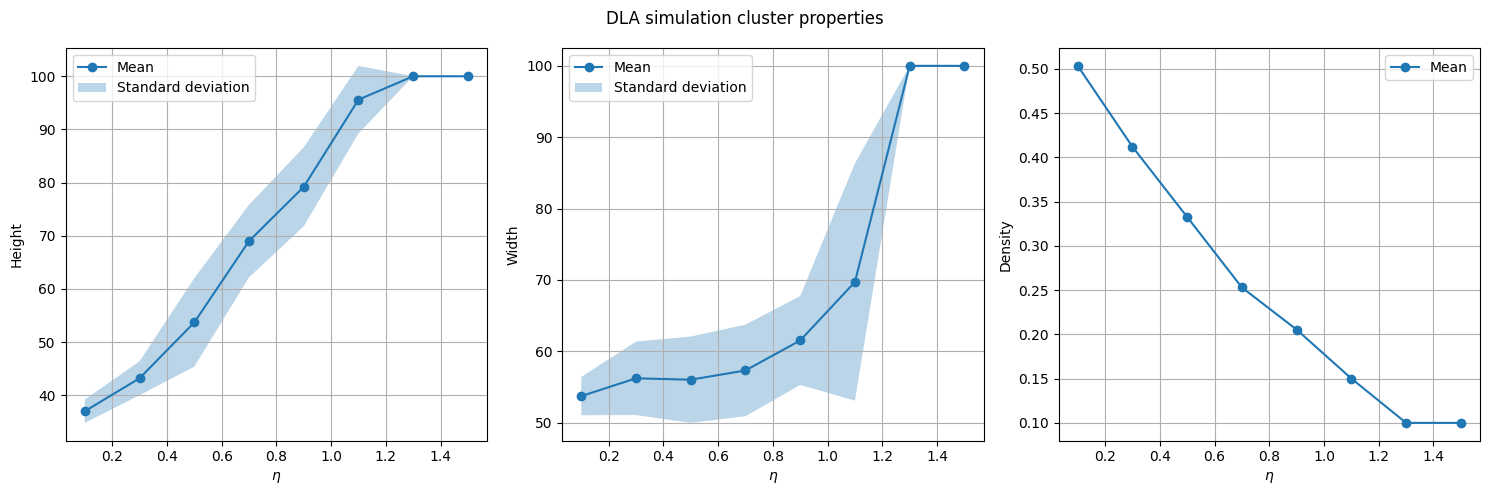

In [34]:
# Plot the results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Height
ax[0].plot([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5], np.mean(total_heights, axis=1), 'o-', label='Mean')
ax[0].fill_between([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5], np.mean(total_heights, axis=1) - np.std(total_heights, axis=1), np.mean(total_heights, axis=1) + np.std(total_heights, axis=1), alpha=0.3, label='Standard deviation')
ax[0].set_xlabel(r'$\eta$')
ax[0].set_ylabel('Height')
ax[0].legend()
ax[0].grid()

# Width
ax[1].plot([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5], np.mean(total_widths, axis=1), 'o-', label='Mean')
ax[1].fill_between([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5], np.mean(total_widths, axis=1) - np.std(total_widths, axis=1), np.mean(total_widths, axis=1) + np.std(total_widths, axis=1), alpha=0.3, label='Standard deviation')
ax[1].set_xlabel(r'$\eta$')
ax[1].set_ylabel('Width')
ax[1].legend()
ax[1].grid()

# Density
ax[2].plot([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5], max_size / (np.mean(total_heights, axis=1) * np.mean(total_widths, axis=1)), 'o-', label='Mean')
ax[2].set_xlabel(r'$\eta$')
ax[2].set_ylabel('Density')
ax[2].legend()
ax[2].grid()


plt.suptitle('DLA simulation cluster properties')
plt.tight_layout()
plt.savefig('fig/cluster_properties.png', dpi=300)
plt.show()


In [13]:
results = find_optimal_omega()

Omega: 1.0, Average t: 103.1591, std: 98.36231792302377
Omega: 1.1, Average t: 95.8481, std: 89.65725863749125
Omega: 1.2, Average t: 88.0713, std: 82.42595596236661
Omega: 1.3, Average t: 82.7063, std: 78.1949745208092
Omega: 1.4, Average t: 79.0175, std: 72.51481361590885
Omega: 1.5, Average t: 69.2801, std: 63.97006834442183
Omega: 1.6, Average t: 64.4485, std: 58.96150903555641
Omega: 1.7, Average t: 57.4384, std: 48.072135436653944
Omega: 1.7999999999999998, Average t: 53.6906, std: 39.514881647804536
Omega: 1.9, Average t: 73.1147, std: 28.3904586773444


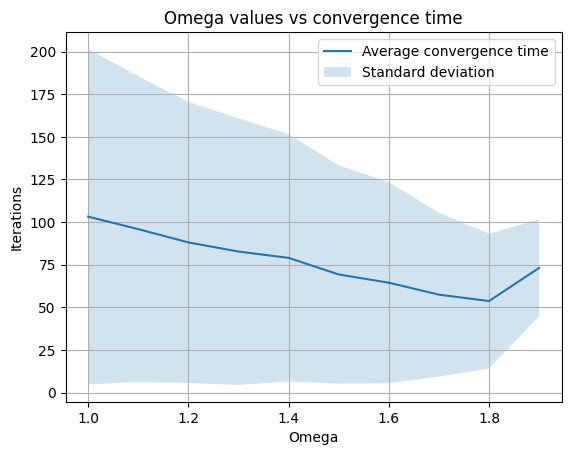

In [15]:
plt.plot(np.linspace(1.0, 1.9, 10), results[:, 0], label="Average convergence time")
plt.fill_between(np.linspace(1.0, 1.9, 10), results[:, 0] - results[:, 1], results[:, 0] + results[:, 1], alpha=0.2, label="Standard deviation")
plt.xlabel("Omega")
plt.ylabel("Iterations")
plt.legend()
plt.grid()
plt.title("Omega values vs convergence time")
plt.show()